In [ ]:
# This is a testbed for reading in frames from LMIRcam and analyzing the PSF

# created 2018 May 2 by E.S.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import scipy.ndimage
from scipy.optimize import curve_fit
import glob
import pandas as pd

In [3]:
def make_cookie(image):
    
    # find the center of the PSF
    # first pass: find the maximum value of the array when bad pixels are removed
    space = 25
    center_y, center_x = np.where(image == np.max(image)) # needs refining
    cookie = image[center_y[0]-space:center_y[0]+space,center_x[0]-space:center_x[0]+space]
    
    return center_x[0], center_y[0], cookie

In [4]:
# take FFT of a cookie cut-out

def cookie_fft(cookie):
    
    padI = np.pad(cookie,len(cookie),'edge') # for addl padding
    padI = np.fft.fftshift(padI) # to get rid of checkerboarding

    PhaseExtract = np.fft.fft2(padI)
    PhaseExtract = np.fft.fftshift(PhaseExtract)
    
    AmpPE = np.absolute(PhaseExtract)
    ArgPE = np.angle(PhaseExtract)
    ArgPE_deg = ArgPE*180./np.pi
    
    return AmpPE, ArgPE_deg

In [5]:
# get list of all FITS files

list_output_files_neg = [f for f in glob.glob("./junk/sim_psf*_opd_-*")]
list_output_files_pos = [f for f in glob.glob("./junk/sim_psf*_opd_0*")]

'''
list_output_files = [name for name in os.listdir(dir_name) if 
                     os.path.isfile(os.path.join(dir_name, name))]
'''
list_output_files_neg = np.sort(list_output_files_neg)
list_output_files_pos = np.sort(list_output_files_pos)
files_of_interest = np.concatenate((np.flip(list_output_files_neg),list_output_files_pos))

In [6]:
# will need to make user specify transmission, so that LMIR knows what curve to compare to

In [7]:
files_of_interest

array(['./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-2000_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1950_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1900_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1850_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1800_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1750_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1700_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1650_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1600_tip_0000_tilt_0000_transl_000_PS_10.fits',
       './junk/sim_

In [30]:
# for-loop to read in frames at different OPD, try to extract OPD

stepArray = []
xposArray = []
yposArray = []
highfreq_ampl = []

init_array = np.ones((len(files_of_interest),2))
high_freq_mtf_ampl = pd.DataFrame(init_array, columns=["opd","ampl"])

for num2 in range(0,len(files_of_interest)):
    print(files_of_interest[num2])
    fits_image_filename = files_of_interest[num2]

    image, header = fits.getdata(fits_image_filename,0,header=True)
    image = image[1,:,:]
    
    high_freq_max = np.max(image[947:1110,1388:1540])
    
    high_freq_mtf_ampl["opd"].iloc[num2] = header["OPD_UM"]
    high_freq_mtf_ampl["ampl"].iloc[num2] = high_freq_max

./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-2000_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1950_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1900_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1850_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1800_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1750_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1700_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1650_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1600_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim_psf_00000001chrom_poly_avgwavel_3699_opd_-1550_tip_0000_tilt_0000_transl_000_PS_10.fits
./junk/sim

In [37]:
high_freq_mtf_ampl.to_csv("high_freq_ampl_data.csv")

In [6]:
high_freq_mtf_ampl = pd.read_csv("high_freq_ampl_data.csv")

In [13]:
high_freq_mtf_ampl[30:]

,Unnamed: 0,opd,ampl
30,30,-5.000000e+00,1.526652e+12
31,31,-4.500000e+00,1.554693e+12
32,32,-4.000000e+00,1.580043e+12
33,33,-3.500000e+00,1.602618e+12
34,34,-3.000000e+00,1.622341e+12
35,35,-2.500000e+00,1.639145e+12
36,36,-2.000000e+00,1.652972e+12
37,37,-1.500000e+00,1.663776e+12
38,38,-1.000000e+00,1.671519e+12
39,39,-5.000000e-01,1.676176e+12


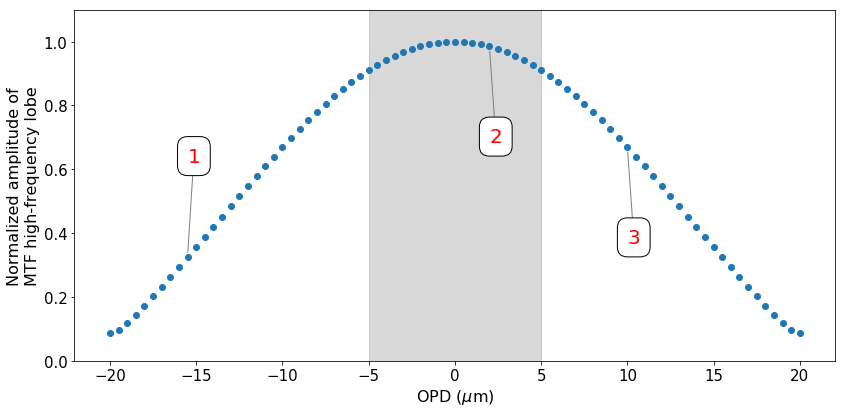

In [18]:
plt.figure(figsize=(12,6))
plt.fill_betweenx(high_freq_mtf_ampl["opd"], 5, -5,
                  where=(high_freq_mtf_ampl["opd"] > -5) & (high_freq_mtf_ampl["opd"] < 5),
                  color="grey",alpha=0.3,
                  interpolate=True)
plt.scatter(high_freq_mtf_ampl["opd"],np.divide(high_freq_mtf_ampl["ampl"],
                                                np.max(high_freq_mtf_ampl["ampl"])))
#plt.fill_between([-5,5])
plt.xlabel("OPD ($\mu$m)", fontsize=16)
plt.ylabel("Normalized amplitude of\nMTF high-frequency lobe", fontsize=16)

xy_1 = [-15.5, np.divide(5.437624e+11,np.max(high_freq_mtf_ampl["ampl"]))]
plt.annotate("1", xy=xy_1, xytext=(xy_1[0],xy_1[1]+0.3), color="red", fontsize=20, alpha=1, 
             arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None), 
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))

xy_2 = [2, np.divide(1.652972e+12,np.max(high_freq_mtf_ampl["ampl"]))]
plt.annotate("2", xy=xy_2, xytext=(xy_2[0],xy_2[1]-0.3), color="red", fontsize=20, alpha=1, 
             arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None), 
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))

xy_3 = [10,np.divide(1.123122e+12,np.max(high_freq_mtf_ampl["ampl"]))]
plt.annotate("3", xy=xy_3, xytext=(xy_3[0],xy_3[1]-0.3), color="red", fontsize=20, alpha=1, 
             arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None), 
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))

plt.rcParams.update({'font.size': 15})
plt.ylim([0,1.1])
plt.tight_layout()
#plt.show()
plt.savefig("fft_ampl_fcn_opd.pdf")

In [15]:
fits_image_filename = dir_name + files_of_interest[0]
hdul = fits.open(fits_image_filename)
image = hdul[0].data
#test = image
test = scipy.ndimage.interpolation.shift(image,[5,0])

In [16]:
x, y, test2 = make_cookie(test)
AmpPE, ArgPE_deg = cookie_fft(test2)

In [17]:
plt.imshow(AmpPE)
plt.show()

In [13]:
plt.imshow(ArgPE_deg)
plt.show()

In [15]:
import scipy.ndimage

In [43]:
plt.plot(highfreq_ampl)
plt.plot((np.subtract(xposArray,1027.5))*1000)
plt.xlabel('OPD (2*N um)')
plt.ylabel('FT ampl high-freq amplitude + rescaled x-coord of found center')
plt.show()

In [46]:
# define gaussian

def gauss(x, *p):
    
    a, b, c, d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

    return y

In [7]:
# define parabola

def parab(x, *p):
    
    a, b, d = p
    y = a*np.power((x - b), 2.) + d

    return y

In [8]:
# fit a parabola to datapoints 0:30

p_initial = [np.max(highfreq_ampl), 0.0, np.max(highfreq_ampl)]
popt, pcov = curve_fit(parab, stepArray[0:30], highfreq_ampl[0:30], p0=p_initial)

# Generate y-data based on the fit.
y_fit = parab(stepArray, *popt)

In [60]:
print(popt)

[ -4.08437873e+02   9.29858015e-01   7.26566748e+05]


In [9]:
plt.plot(stepArray,highfreq_ampl)
plt.plot(stepArray,y_fit)
plt.ylim([0,1e6])
plt.show()

In [ ]:
# shift the PSF left-right (3 pix) to try to maximize the low-freq ampl lobe (in parallel)

# wait-- if OPD!=0, will this really center the PSF?

In [ ]:
# shift the PSF up-down (3 pix) to try to maximize the low-freq ampl lobe

In [ ]:
# Analysis based on this single epoch



# Is an OPD scan warranted? (simple for-loop; not parallel)


In [ ]:
# Take a scan in OPD